In [137]:
import jax
import jax.numpy as jnp
import numpy as np

In [138]:
words = open('names.txt').read().splitlines()
len(words)

1356048

In [139]:
J = np.zeros((27,27), dtype=np.int32)
J.shape

(27, 27)

In [140]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [141]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        J[ix1, ix2] += 1

In [142]:
itos = {i:s for s,i in stoi.items()}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

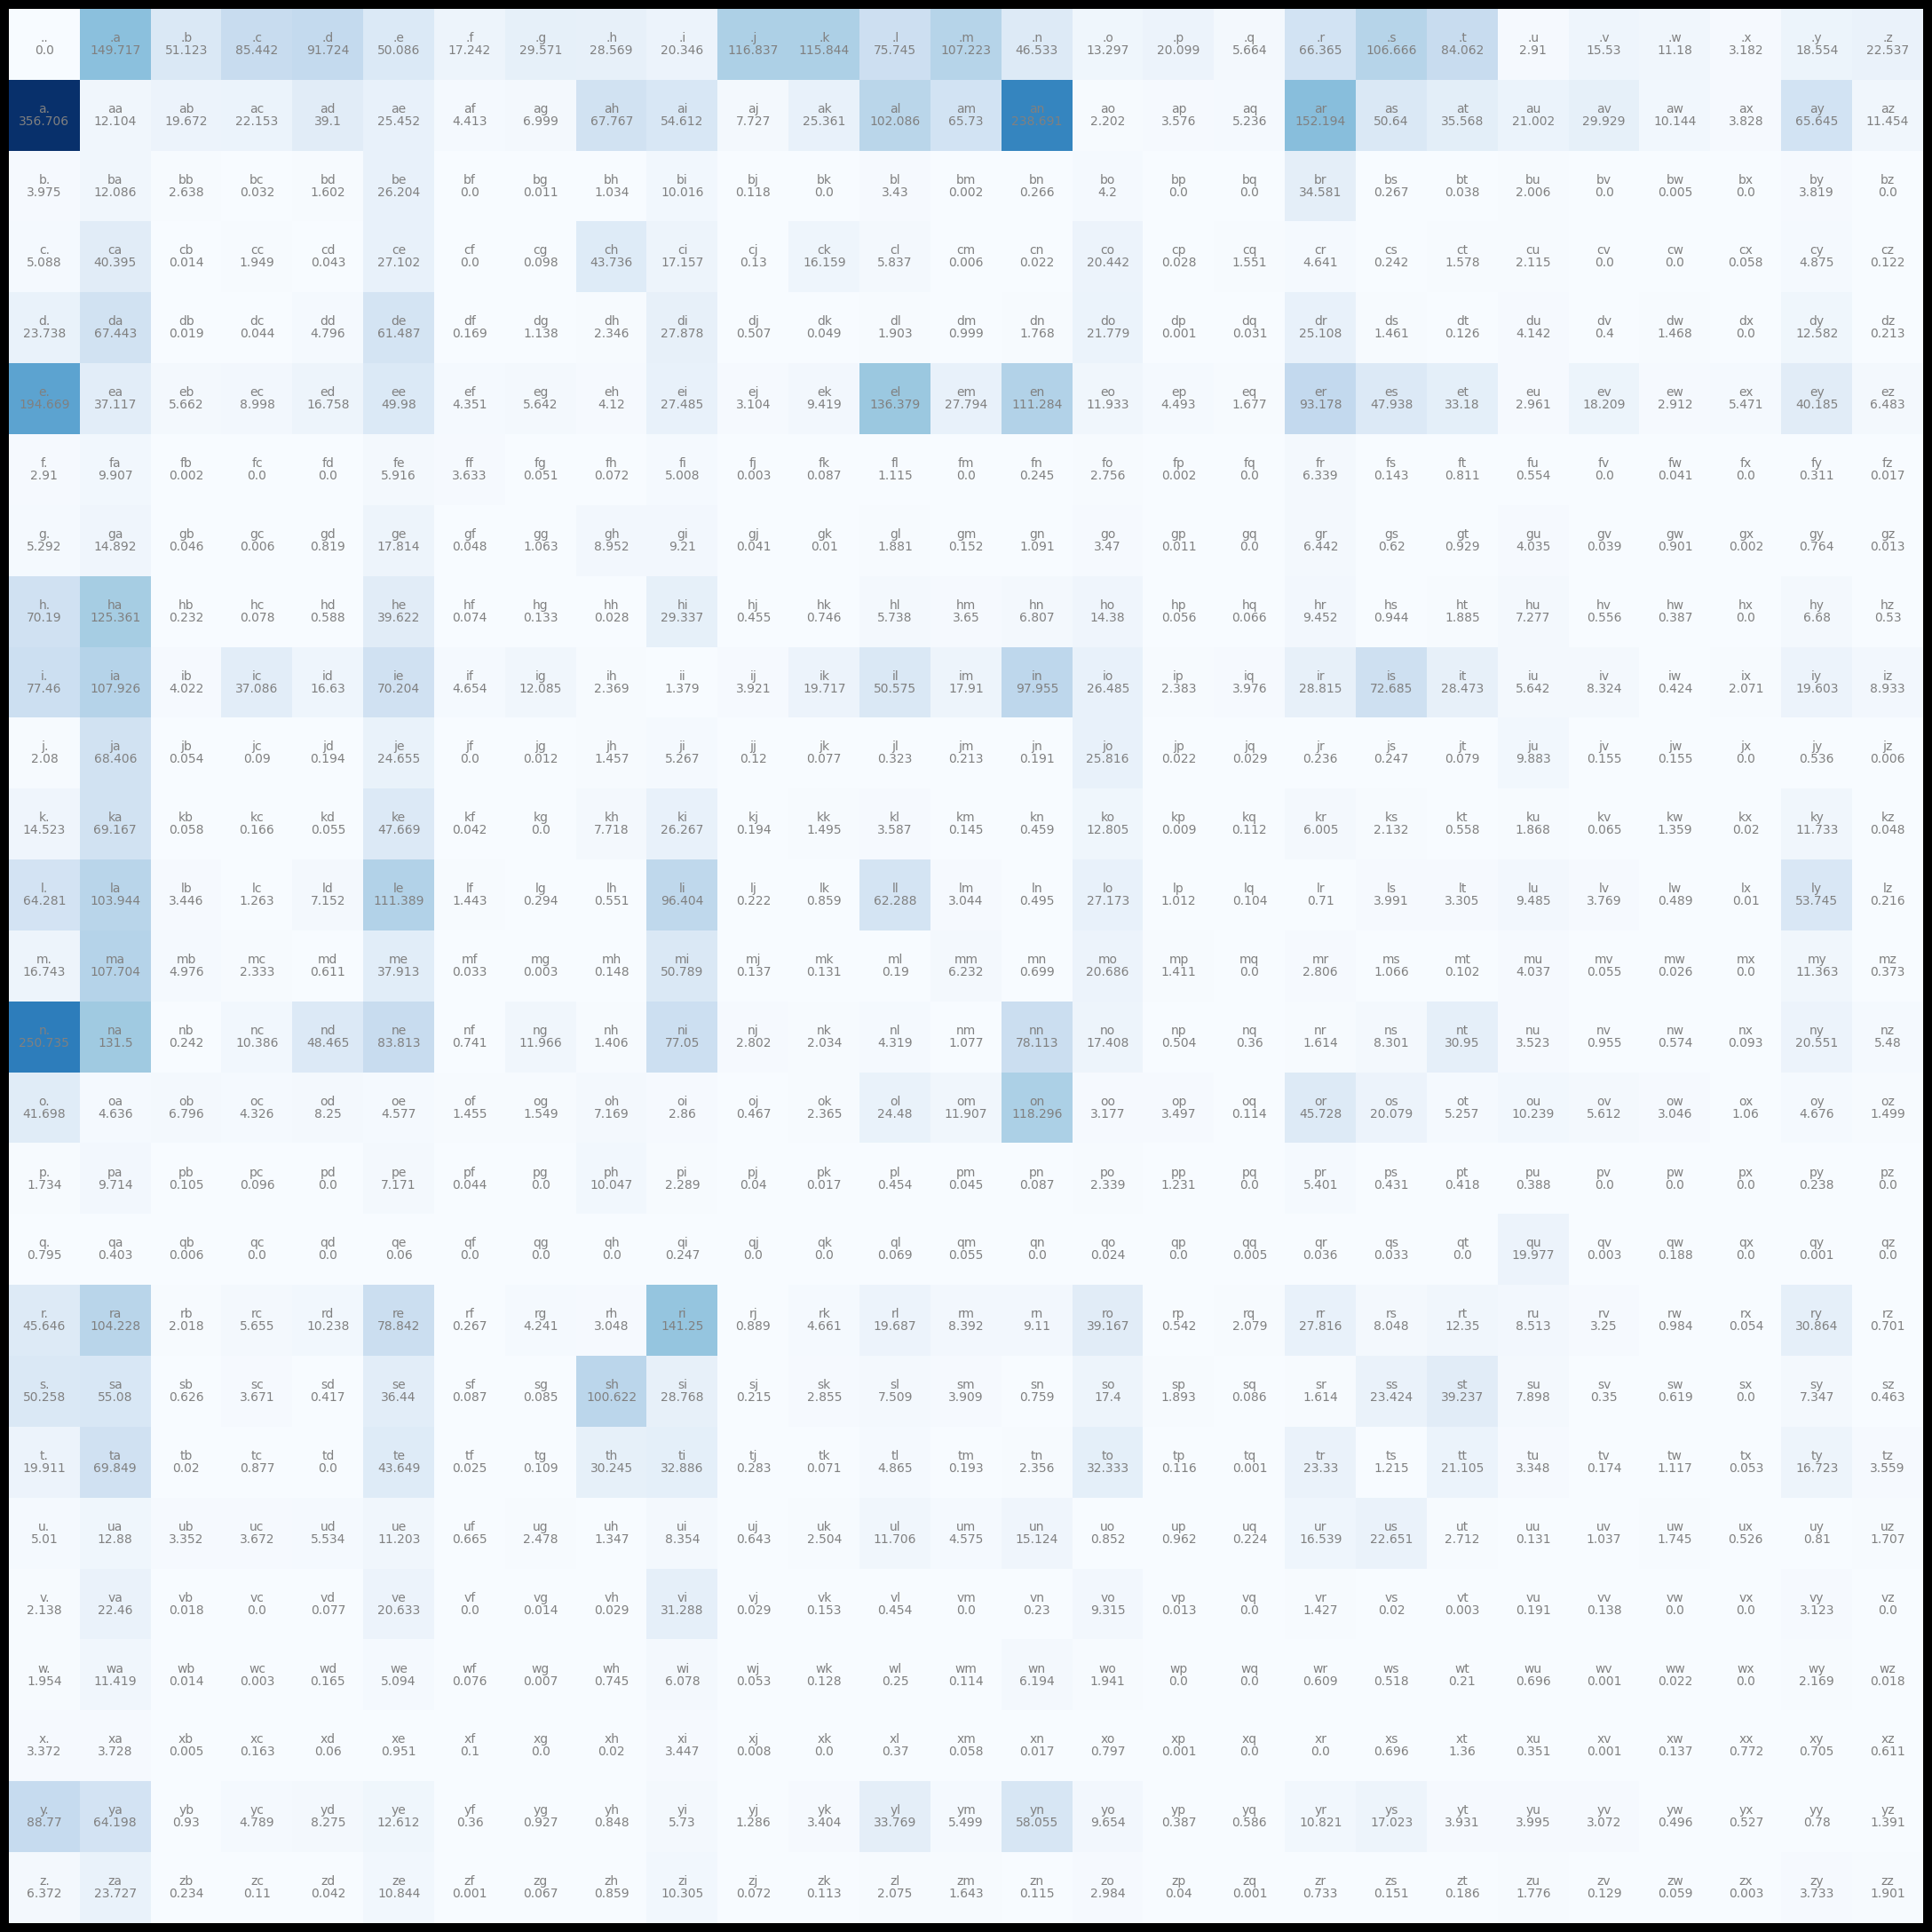

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(28,28))
plt.imshow(J, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center", va="bottom", color='gray')
        repeatTimes = round(J[i,j].item()/1000, 3)
        plt.text(j,i,repeatTimes, ha="center", va="top", color='gray')
plt.axis('off')

In [144]:
p = J[0].astype(np.float32) / J[0].sum().astype(np.float32)
p

array([0.        , 0.11040686, 0.03769999, 0.06300809, 0.06764068,
       0.03693527, 0.01271489, 0.02180675, 0.02106784, 0.01500389,
       0.08615993, 0.08542766, 0.05585717, 0.07907021, 0.03431516,
       0.0098057 , 0.01482175, 0.00417684, 0.04894001, 0.07865946,
       0.06199043, 0.00214594, 0.0114524 , 0.00824455, 0.00234652,
       0.01368241, 0.01661962], dtype=float32)

In [145]:
# numpy use generator object in multinomial and generate 20 samples with probability r3Norm
g = np.random.default_rng(2147483647)
val = g.multinomial(1, p, 10).argmax(axis=1)
# Get index of the maximum value in each row
val
li = [itos[i] for i in val.tolist()]
li

['h', 'k', 'd', 'a', 's', 'd', 'r', 'a', 'p', 't']

In [146]:
# Count the number of times each character appears
count = [0] * 27
for i in range(10):
    count[val[i]] += 1

# Print the number of times each character appears
for i in range(27):
    print(itos[i], count[i])

. 0
a 2
b 0
c 0
d 2
e 0
f 0
g 0
h 1
i 0
j 0
k 1
l 0
m 0
n 0
o 0
p 1
q 0
r 1
s 1
t 1
u 0
v 0
w 0
x 0
y 0
z 0


In [147]:
rowSum = J.sum(axis=1, keepdims=True).astype(np.float32)
J = J.astype(np.float32)
J /= rowSum
J

array([[0.00000000e+00, 1.10406861e-01, 3.76999937e-02, 6.30080923e-02,
        6.76406771e-02, 3.69352698e-02, 1.27148889e-02, 2.18067504e-02,
        2.10678391e-02, 1.50038935e-02, 8.61599296e-02, 8.54276568e-02,
        5.58571666e-02, 7.90702105e-02, 3.43151577e-02, 9.80569981e-03,
        1.48217464e-02, 4.17684345e-03, 4.89400066e-02, 7.86594599e-02,
        6.19904324e-02, 2.14594183e-03, 1.14523973e-02, 8.24454613e-03,
        2.34652450e-03, 1.36824064e-02, 1.66196190e-02],
       [2.47714043e-01, 8.40560813e-03, 1.36611965e-02, 1.53841237e-02,
        2.71529481e-02, 1.76751111e-02, 3.06460238e-03, 4.86044725e-03,
        4.70607094e-02, 3.79252359e-02, 5.36600593e-03, 1.76119152e-02,
        7.08934963e-02, 4.56461199e-02, 1.65758669e-01, 1.52917625e-03,
        2.48334883e-03, 3.63613386e-03, 1.05690941e-01, 3.51668857e-02,
        2.47001536e-02, 1.45848133e-02, 2.07841583e-02, 7.04448856e-03,
        2.65834993e-03, 4.55870889e-02, 7.95421656e-03],
       [3.73836160e-02

In [148]:
g = np.random.default_rng(2147483647)

for i in range(30):
    ix = 0
    while True:
        ix = g.multinomial(1, J[ix], 1).argmax(axis=1).item()
        print(itos[ix], end='')
        if ix == 0:
            break
    print()

h.
ja.
a.
shmielieurishetasmanady.
mylishtoleva.
s.
tian.
she.
zoxya.
lica.
kann.
kare.
kilynetordenda.
d.
kavile.
rden.
e.
kaahianynavimi.
mar.
oda.
nteralanan.
m.
oriyneie.
riafriesshalll.
ila.
bbrikaeslayn.
yarimaia.
ddsmon.
keoninallyshorquehelahlikandy.
cria.
